In [1]:
import matplotlib.pyplot as plt
from stable_baselines3 import DDPG
from stable_baselines3.common.callbacks import BaseCallback
import gymnasium as gym

In [2]:
env = gym.make("Humanoid-v5")

In [3]:
policy_kwargs = dict(net_arch=[400, 300])
learning_rate_actor = 1e-4
buffer_size = 1_000_000
batch_size = 100
tau = 0.005

In [4]:
reward_log = []

In [5]:
class RewardLoggerCallback(BaseCallback):
    def __init__(self):  # Fixed initialization method name
        super(RewardLoggerCallback, self).__init__()
        self.cumulative_reward = 0  # Накопичувальна винагорода
        
    def _on_step(self) -> bool:
        self.cumulative_reward += self.locals["rewards"][0]  # Додати винагороду за поточний крок
        reward_log.append(self.cumulative_reward)  # Логування на кожному кроці
        return True

In [6]:
model = DDPG(
    "MlpPolicy",
    env,
    learning_rate=learning_rate_actor,
    buffer_size=buffer_size,
    batch_size=batch_size,
    tau=tau,
    policy_kwargs=policy_kwargs,
    verbose=1
)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [7]:
timesteps = 10_000  # Для швидшого прикладу
model.learn(total_timesteps=timesteps, callback=RewardLoggerCallback())

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20       |
|    ep_rew_mean     | 93.7     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 975      |
|    time_elapsed    | 0        |
|    total_timesteps | 80       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.1     |
|    ep_rew_mean     | 114      |
| time/              |          |
|    episodes        | 8        |
|    fps             | 160      |
|    time_elapsed    | 1        |
|    total_timesteps | 201      |
| train/             |          |
|    actor_loss      | -9.44    |
|    critic_loss     | 4.96     |
|    learning_rate   | 0.0001   |
|    n_updates       | 100      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.8     |
|    ep_rew_mean     | 98.5     |
| time/       

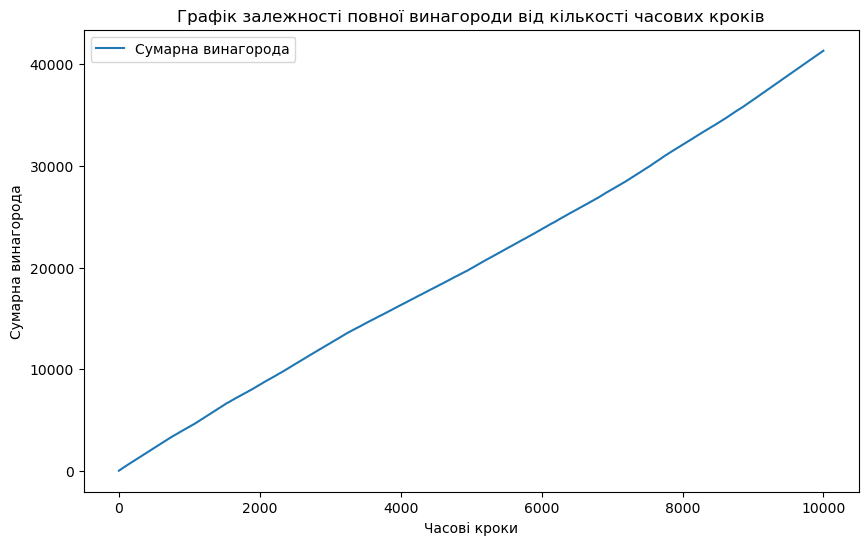

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(reward_log, label="Сумарна винагорода")
plt.xlabel("Часові кроки")
plt.ylabel("Сумарна винагорода")
plt.title("Графік залежності повної винагороди від кількості часових кроків")
plt.legend()
plt.show()